# Instructions
In this assignment, you should use this Jupyter notebook to answer the questions below. Simply type your code into embedded chunks. 

For all the programming homeworks, you should submit two UNCOMPRESSED files:
1). A report as a Jupyter notebook (extension ipynb) organized by questions, with the proper explanation for every answer
2). The same Jupyter notebook saved as an HTML or pdf file. 

From the file menu of the Jupyter notebook, you can download the Jupyter notebook and the same report as a HTML or pdf file: File --> Download as:

Failure to include the report as a Jupyter notebook or its pdf/html version will result in a deduction of 50% and 20% respectively. If you want to improve your homework, you can resubmit it until the deadline.

# Data imputation:


## 1. Download the dataset credit-data-post-import.csv, randomly split your dataset in two datasets: training (75% observations) and testing (25% observations). We'll use the training set to calibrate our model and then use the test set to evaluate how effective it is.


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 12

## I imported data using pd.read_cvs and then splitted the data two two parts based on  the quetion stem:



In [51]:
df = pd.read_csv ('credit-data-post-import.csv')
train, test = train_test_split(df, test_size=0.25)

## 2. Split our training data into 2 groups: data containing nulls and data not containing nulls on the monthly_income variable. Train on the latter and make 'predictions' on the null data to impute monthly_income using a regression algorithm with the variables 'number_real_estate_loans_or_lines' and 'number_of_open_credit_lines_and_loans'. Save your train and test datasets in the csv files: credit-data-trainingset.csv and credit-data-testset.csv. For this first part, the report can simply compare the number of observations of each dataset (train and test) before and after the correction of null values.




## I genereated dummy variables for train and test data, which are equal to 1 if monthly_income is non-null, and 0 otherwise:

In [52]:
train['dummy'] = np.where(train['monthly_income'].isna(),0,1)
test['dummy'] = np.where(test['monthly_income'].isna(),0,1)


C:\Users\DELL\AppData\Local\Temp/ipykernel_23920/3740546448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['dummy'] = np.where(train['monthly_income'].isna(),0,1)
C:\Users\DELL\AppData\Local\Temp/ipykernel_23920/3740546448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['dummy'] = np.where(test['monthly_income'].isna(),0,1)


In [53]:
pred_train = train[train['dummy'] == 0]
test_train = train[train['dummy'] == 1]

pred_test = test[test['dummy'] == 0]
test_test = test[test['dummy'] == 1]



## preprocessing the data for linear regression imputation:

In [54]:
lr = LinearRegression()
y = ["monthly_income"]
x = ["number_real_estate_loans_or_lines","number_of_open_credit_lines_and_loans"]

## i used non-null training set to predict null train and test datasets below:

In [55]:
lr.fit(X=test_train[x],y=test_train[y])
pred_train.drop("monthly_income",axis=1,inplace=True)
pred_tra = lr.predict(pred_train[x])

pred_test.drop("monthly_income",axis=1,inplace=True)
pred_tes = lr.predict(pred_test[x])

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Here I combined imputed non-null datasets and renamed it as post_train and post_test, respectively

In [56]:
pred_train['monthly_income']=pred_tra
post_train = pd.concat([pred_train, test_train])

pred_test['monthly_income']=pred_tes
post_test = pd.concat([pred_test, test_test])

C:\Users\DELL\AppData\Local\Temp/ipykernel_23920/4138332953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_train['monthly_income']=pred_tra
C:\Users\DELL\AppData\Local\Temp/ipykernel_23920/4138332953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_test['monthly_income']=pred_tes


In [57]:
post_train.shape,train.shape

((112500, 12), (112500, 12))

In [58]:
post_test.shape,test.shape

((37500, 12), (37500, 12))

## save it as csv files, as required

In [59]:
post_train.to_csv('credit-data-trainingset_post.csv')
#train.to_csv('credit-data-trainingset_pre.csv')
post_test.to_csv('credit-data-testset_post.csv')
#test.to_csv('credit-data-testset_pre.csv')



## You can see the number of ovservations of each dataset before and after imputation below and its corredponding mean value for monthly incomes below:

In [61]:
post_train.info(),train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112500 entries, 148510 to 43707
Data columns (total 12 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   serious_dlqin2yrs                            112500 non-null  int64  
 1   revolving_utilization_of_unsecured_lines     112500 non-null  float64
 2   age                                          112500 non-null  int64  
 3   number_of_time30-59_days_past_due_not_worse  112500 non-null  int64  
 4   debt_ratio                                   112500 non-null  float64
 5   number_of_open_credit_lines_and_loans        112500 non-null  int64  
 6   number_of_times90_days_late                  112500 non-null  int64  
 7   number_real_estate_loans_or_lines            112500 non-null  int64  
 8   number_of_time60-89_days_past_due_not_worse  112500 non-null  int64  
 9   number_of_dependents                         112500 non

(None, None)

In [311]:
pred_train['monthly_income'].mean(axis = 0, skipna = True)

6224.822631560482

In [312]:
test_train['monthly_income'].mean(axis = 0, skipna = True)

6661.494309934068

In [313]:
post_train['monthly_income'].mean(axis = 0, skipna = True)

6575.110948136698

In [314]:
train['monthly_income'].mean(axis = 0, skipna = True)

6661.494309934068

## Its pretty intuitive to see a lower mean value of monthly_income (the one without imputation) 

In [62]:
post_test.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37500 entries, 66550 to 75594
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   serious_dlqin2yrs                            37500 non-null  int64  
 1   revolving_utilization_of_unsecured_lines     37500 non-null  float64
 2   age                                          37500 non-null  int64  
 3   number_of_time30-59_days_past_due_not_worse  37500 non-null  int64  
 4   debt_ratio                                   37500 non-null  float64
 5   number_of_open_credit_lines_and_loans        37500 non-null  int64  
 6   number_of_times90_days_late                  37500 non-null  int64  
 7   number_real_estate_loans_or_lines            37500 non-null  int64  
 8   number_of_time60-89_days_past_due_not_worse  37500 non-null  int64  
 9   number_of_dependents                         37500 non-null  float64

(None, None)

In [315]:
pred_test['monthly_income'].mean(axis = 0, skipna = True)

6239.591656997042

In [316]:
test_test['monthly_income'].mean(axis = 0, skipna = True)

6696.452304822808

In [317]:
post_test['monthly_income'].mean(axis = 0, skipna = True)

6605.372566072264

In [318]:
test['monthly_income'].mean(axis = 0, skipna = True)

6696.452304822808

# Credit risk:
## In this second part of this exercise, you must determine whether you will give a loan to a client based on his/her default history using the variable serious_dlqin2yrs (serious delinquency rate 2 years: 1 defaults, 0 otherwise).

## 3. Using only the credit-data-trainingset.csv data, you must compare the accuracy of the following algorithms using cross-validation (cross_val_score) and select the algorithm with the highest accuracy:

## 3.1.- Logistic regression (sklearn.linear_model.LogisticRegression) using penalty (regularization) L1 
## 3.2.- Logistic regression (sklearn.linear_model.LogisticRegression) using penalty (regularization) L2 
## 3.3.- SVM (sklearn.svm.LinearSVC) using penalty (regularization) L2 
## 3.4.- Neural networks

## for 3.1-3.4 I first preprocessing the data and did what the question stem asked

In [64]:
# 3 data loading and random shuffle

trainingset_post = pd.read_csv ('credit-data-trainingset_post.csv')
trainingset_post = trainingset_post.sample(frac=1, random_state=1).reset_index()


In [65]:
trainingset_post=trainingset_post.drop(['Unnamed: 0','index'], axis=1)

In [66]:
d = ["dummy"]
y = ["serious_dlqin2yrs"]
x = list(set(trainingset_post.columns) - set(y)-set(d))


## 3.1 Logistic regression(L_1) with cross validation:

In [68]:
lgc_l1 = LogisticRegression(C=.1,penalty='l1',random_state=0,solver='liblinear')
scores = cross_val_score(lgc_l1, trainingset_post[x], trainingset_post[y], cv=5, scoring='accuracy')
print('Mean score : ', np.mean(scores))
print('Score variance : ', np.var(scores))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Mean score :  0.9330044444444445
Score variance :  1.2847407407406945e-07


## 3.2 Logistic regression(L_2) with cross validation:

In [69]:
lgc_l2 = LogisticRegression(C=.1,penalty='l2',random_state=0,solver='liblinear')
scores = cross_val_score(lgc_l2, trainingset_post[x], trainingset_post[y], cv=5, scoring='accuracy')
print('Mean score : ', np.mean(scores))
print('Score variance : ', np.var(scores))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Mean score :  0.9331644444444445
Score variance :  2.1649382716047246e-08


 ## 3.3 LinearSCV with cross validation with cross validation:

In [70]:
clf_l2 = LinearSVC(C=.1, random_state=0,penalty='l2') 
scores = cross_val_score(clf_l2, trainingset_post[x], trainingset_post[y], cv=5, scoring='accuracy')
print('Mean score : ', np.mean(scores))
print('Score variance : ', np.var(scores))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\valida

Mean score :  0.90648
Score variance :  0.0028654588839506167


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## 3.4 Neural networks(Perceptron) with cross validation:

In [71]:
per = Perceptron(random_state=0,max_iter=50,tol=.001)
scores = cross_val_score(per, trainingset_post[x], trainingset_post[y], cv=5, scoring='accuracy')
print('Mean score : ', np.mean(scores))
print('Score variance : ', np.var(scores))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Mean score :  0.9305066666666667
Score variance :  9.436918518518376e-06


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## 3.4 Neural networks (MLPClassifier) with cross validation:

In [72]:

mlp = MLPClassifier(random_state=0,learning_rate_init= 0.01,max_iter=50)
scores = cross_val_score(mlp, trainingset_post[x], trainingset_post[y], cv=5, scoring='accuracy')
print('Mean score : ', np.mean(scores))
print('Score variance : ', np.var(scores))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Mean score :  0.9326933333333333
Score variance :  4.740740740755487e-10


## To sum up, I found that Logistic regression with L2 proformed the best in terms of average cross validation score(0.9332) and has the second lowest variance(2.16 *10^-8) amoung all four algorithms.

## 4. Use the best model and select the best parameters using grid search (GridSearchCV).

In [ ]:
grid={"C":np.logspace(-3,3,7)}
lgc_l2 = LogisticRegression(C=.1,penalty='l2',random_state=0,solver='liblinear')
lgc_l2_cv=GridSearchCV(lgc_l2,grid,cv=10)
lgc_l2_cv.fit(trainingset_post[x],trainingset_post[y])


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

## I did a grid search for C (the size of the inverse of penalty parameter), the best for me is 0.1 and the accuracy is 0.9334:

In [74]:
print("tuned hpyerparameters :(best parameters) ",lgc_l2_cv.best_params_)
print("accuracy :",lgc_l2_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1}
accuracy : 0.933377777777778


## 5. Train your best model with the training dataset (credit-data-trainingset.csv).

In [75]:
#5
trainingset_post = pd.read_csv ('credit-data-trainingset_post.csv')
trainingset_post = trainingset_post.sample(frac=1, random_state=1).reset_index()
trainingset_post=trainingset_post.drop(['Unnamed: 0','index'], axis=1)
d = ["dummy"]
y = ["serious_dlqin2yrs"]
x = list(set(trainingset_post.columns) - set(y)-set(d))

In [76]:
lgc_l2 = LogisticRegression(C=.1,penalty='l2',random_state=0,solver='liblinear')
lgc_l2.fit(trainingset_post[x],trainingset_post[y])

# y_test = trainingset_post['serious_dlqin2yrs']
# pred = lgc_l1.predict(trainingset_post[x])
# print(metrics.accuracy_score(pred,y_test))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.1, random_state=0, solver='liblinear')

## 6. Test your model using the test dataset (credit-data-testset.csv) and show its accuracy.

In [77]:
post_test = pd.read_csv ('credit-data-testset_post.csv')
post_test = post_test.sample(frac=1, random_state=0).reset_index()

y_test = post_test['serious_dlqin2yrs']
pred = lgc_l2.predict(post_test[x])
print(metrics.accuracy_score(pred,y_test))

0.9351466666666667


## This tells me the this c and this model did fairly well for prediction (0.935) in the test datset.

## 7. Build the ROC (include the area under the ROC curve), the cumulative response and lift curves for the 4 algorithms mentioned above. Discuss your results comparing the 4 algorithms.

## Note: the main reference for question 7 is based on Professor's Section 5's materials.

In [78]:
#merge non-nulls data for train and test together

post = pd.concat([trainingset_post, post_test])
post=post.drop(['Unnamed: 0','index'], axis=1)
#post.info()

d = ["dummy"]
y = ["serious_dlqin2yrs"]
x = list(set(post.columns) - set(y)-set(d))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

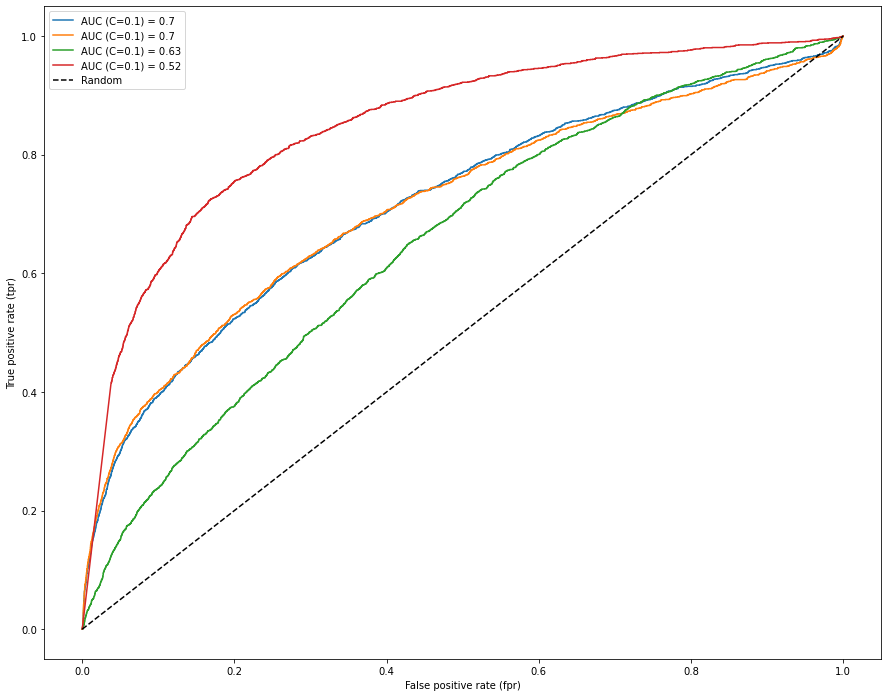

In [82]:
#Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(post[x], post[y], test_size=.2)

# Fit a logistic regression model
models = [LogisticRegression(C=.1,penalty='l1',random_state=0,solver='liblinear'), 
               LogisticRegression(C=.1,penalty='l2',random_state=0,solver='liblinear'), 
               CalibratedClassifierCV(LinearSVC(C=.1, random_state=0,penalty='l2',max_iter=50)), 
               MLPClassifier(random_state=0,learning_rate_init= 0.01,max_iter=50)]

for model in models:
    model.fit(X_train, Y_train)
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    auc = np.mean(cross_val_score(model, post[x], post[y], scoring="roc_auc", cv=5))
    plt.plot(fpr, tpr, label="AUC (C=" + str(.1) + ") = " + str(round(auc, 2)))

plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc='best') 

## In terms of the labelling , the blue line, orange line, green line, and red line represent L_1 logristic, L_2 logristic, linear SVC, and MLP, respectrively.
## Note that I found the result from MLP is not very stable. 

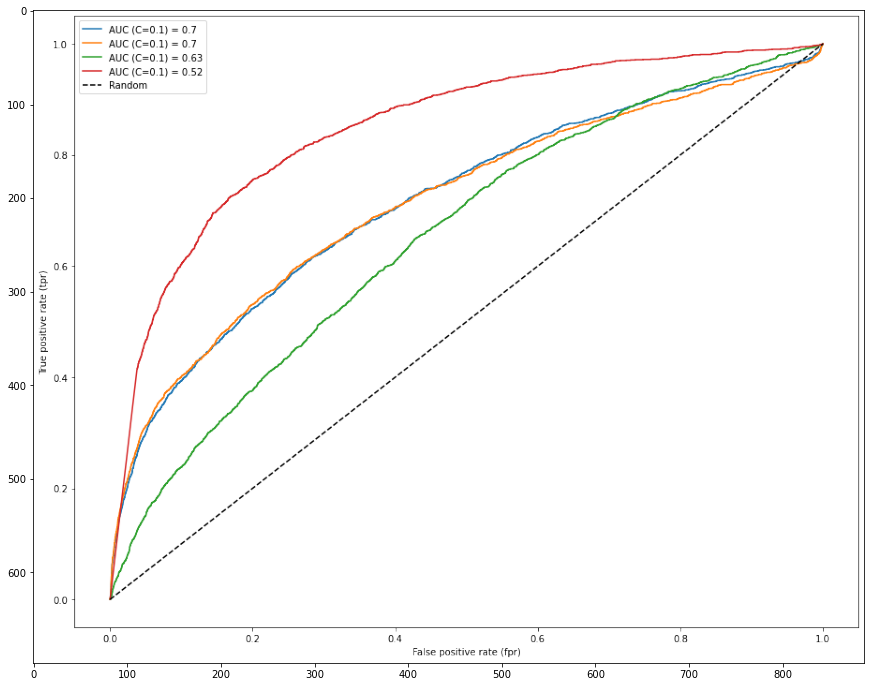

In [84]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("multiple_roc_curve.png")
plt.imshow(image)
plt.show()

In [85]:
def build_cumulative_curve(model, scale=100):
    # Fit model
    model.fit(X_train, Y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    # Sort theseprobabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(Y_test)[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing score)")
    plt.ylabel("Percentage of positives targeted")
    plt.title("Cumulative response curve")
    plt.legend()

    


models = {"Logistic Regression_L1": LogisticRegression(C=.1,penalty='l1',random_state=0,solver='liblinear'),
          "Logistic Regression_L2": LogisticRegression(C=.1,penalty='l2',random_state=0,solver='liblinear'), 
          "LinearSVC":CalibratedClassifierCV(LinearSVC(C=.1, random_state=0,penalty='l2',max_iter=50)),
          "MLPClassifier":CalibratedClassifierCV(LinearSVC(C=.1, random_state=0,penalty='l2',max_iter=50))}

def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\a

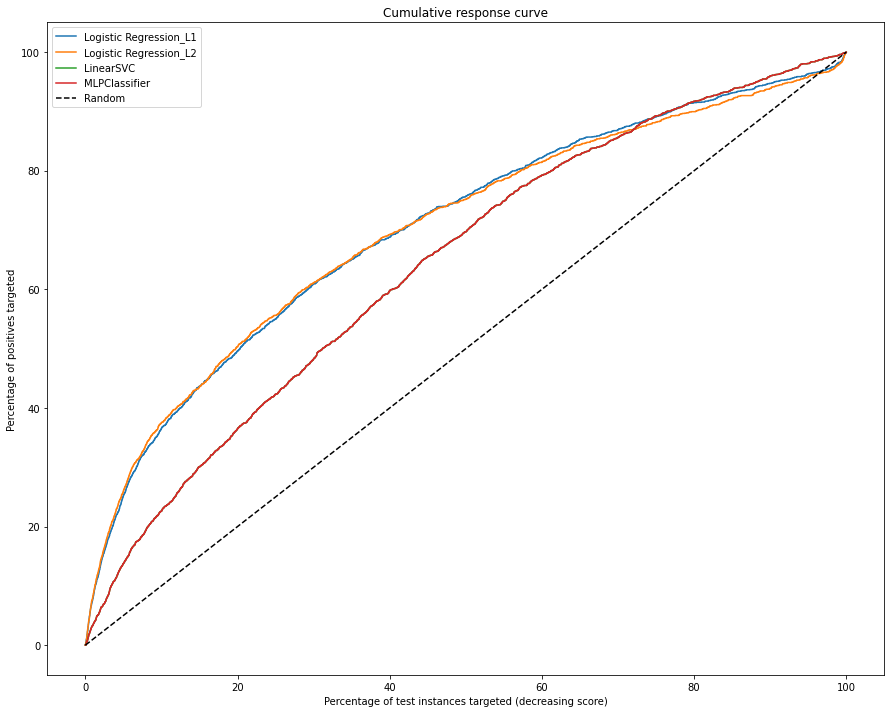

In [86]:
plot_cumulative_curve(models)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\a

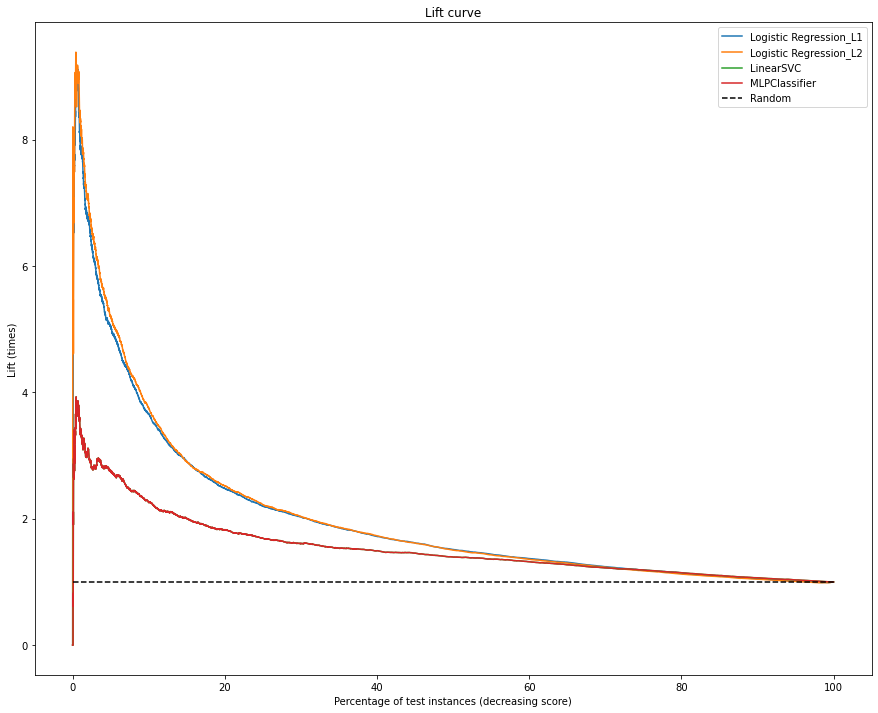

In [87]:
plot_lift_curve(models)

## To sum up, after looking at the cumulative response and lifting curves, I would argue that MLP did a fairly bad job (e.g., at the 10% point of the horizontal axis, only 20% observations with the highest probability are located and 2 times of lifting are produced).
## The other three algorithms are more or less similar in this two metrics; however, if you look closer the orange line-L2 Logristic has a slightly edge.